In [2]:
import csv

#convert data txt file into csv file
input_file_path = '/content/drive/Shareddrives/cs/movies.txt'
output_file_path = '/content/drive/Shareddrives/cs/new.csv'


input_file = open(input_file_path, 'r',encoding= u'utf-8',errors='ignore')
cols = [
    'ProductId',
    'Userid',
    'Profilename',
    'Helpfulness',
    'Score',
    'Time',
    'Summary',
    'Text'
    ]

output_file = open(output_file_path, 'w', encoding='utf8')
w = csv.writer(output_file)
w.writerow(cols) # write table header first

def write_row(doc):
    w.writerow([doc.get(col) for col in cols])

count = 0
doc = {}
for line in input_file:
    line = line.strip()
    if line == '':
        write_row(doc)
        doc = {}
        count += 1
       
    else:
        idx = line.find(':')
        key, value = tuple([line[:idx], line[idx+1:]])
        key = key.strip().replace('/', '_').lower()
        value = value.strip()
        doc[key] = value

# write the last row if there is one
if doc:
    write_row(doc)
    count += 1


# close files
input_file.close()
output_file.close()


In [3]:
#read 1 million rows and save it as a new csv file
data=pd.read_csv('/content/drive/Shareddrives/cs/movie_data.csv',nrows = 1000000)
data.to_csv('/content/drive/Shareddrives/cs/Data/movie_reviews',index=False)

In [4]:
#read the final dataset
import pandas as pd
df=pd.read_csv('./data/movie_reviews')

In [5]:
df.head(5)

,product_productid,review_userid,review_profilename,review_helpfulness,review_score,review_time,review_summary,review_text
0,B003AI2VGA,A141HP4LYPWMSR,"Brian E. Erland ""Rainbow Sphinx""",7/7,3.0,1182729600,"""There Is So Much Darkness Now ~ Come For The ...","Synopsis: On the daily trek from Juarez, Mexic..."
1,B003AI2VGA,A328S9RN3U5M68,Grady Harp,4/4,3.0,1181952000,Worthwhile and Important Story Hampered by Poo...,THE VIRGIN OF JUAREZ is based on true events s...
2,B003AI2VGA,A1I7QGUDP043DG,"Chrissy K. McVay ""Writer""",8/10,5.0,1164844800,This movie needed to be made.,The scenes in this film can be very disquietin...
3,B003AI2VGA,A1M5405JH9THP9,golgotha.gov,1/1,3.0,1197158400,distantly based on a real tragedy,THE VIRGIN OF JUAREZ (2006)<br />directed by K...
4,B003AI2VGA,ATXL536YX71TR,"KerrLines ""&#34;Movies,Music,Theatre&#34;""",1/1,3.0,1188345600,"""What's going on down in Juarez and shining a ...","Informationally, this SHOWTIME original is ess..."


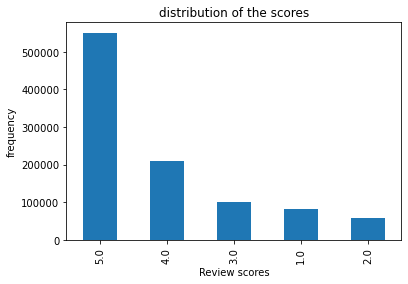

In [6]:
#plot distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df['review_score'].value_counts().plot(ax=ax, kind='bar', xlabel='Review scores', ylabel='frequency')
plt.title('distribution of the scores')
plt.show()

In [7]:
#convert the str values to int values in the column helpfulness
new_int=[]
for x in list(df['review_helpfulness'].values):
  new_list=x.split("/")
  num1=int(new_list[0])
  num2=int(new_list[1])
  if num2==0:
    new_int.append(0)
  else:
    new_int.append(num1/num2)

#print(new_int[:100])
df['review_helpfulness']=new_int

In [8]:
df['review_helpfulness'].head(5)

0    1.0
1    1.0
2    0.8
3    1.0
4    1.0
Name: review_helpfulness, dtype: float64

In [9]:
#change the column
column_name=['ProductId','UserId','review_profilename','Helpfulness','Score','Time','Summary','Text']
df.columns=column_name

In [10]:
#drop the useless columns
df=df.drop(columns=['review_profilename'])

In [11]:
#drop all the NaN values
df.dropna(inplace=True)

In [12]:
#Check if there are any NaN values
df.isnull().sum()

ProductId      0
UserId         0
Helpfulness    0
Score          0
Time           0
Summary        0
Text           0
dtype: int64

In [13]:
# Add new feature, the average product scores
Average_product_score=df[['ProductId','Score']].groupby(df['ProductId']).aggregate({'Score': 'mean'})
df = df.merge(Average_product_score, how='left',on='ProductId')
df = df.rename(columns={'Score_x': 'Score'})
df = df.rename(columns={'Score_y': 'Average_product_score'})

In [14]:
# Add new feature, the average User scores
Average_User_score=df[['UserId','Score']].groupby(df['UserId']).aggregate({'Score': 'mean'})
df = df.merge(Average_User_score, how='left',on='UserId')
df = df.rename(columns={'Score_x': 'Score'})
df = df.rename(columns={'Score_y': 'Average_User_score'})

In [15]:
# Merging Summary and Text into one colunm
df['text + summary']=df['Text'] + ' ' + df['Summary']
df=df.drop(columns=['Text','Summary'])

In [16]:
# cleaned dataset
df.head(5)

,ProductId,UserId,Helpfulness,Score,Time,Average_product_score,Average_User_score,text + summary
0,B003AI2VGA,A141HP4LYPWMSR,1.0,3.0,1182729600,2.857143,4.144766,"Synopsis: On the daily trek from Juarez, Mexic..."
1,B003AI2VGA,A328S9RN3U5M68,1.0,3.0,1181952000,2.857143,4.131435,THE VIRGIN OF JUAREZ is based on true events s...
2,B003AI2VGA,A1I7QGUDP043DG,0.8,5.0,1164844800,2.857143,4.700441,The scenes in this film can be very disquietin...
3,B003AI2VGA,A1M5405JH9THP9,1.0,3.0,1197158400,2.857143,3.357143,THE VIRGIN OF JUAREZ (2006)<br />directed by K...
4,B003AI2VGA,ATXL536YX71TR,1.0,3.0,1188345600,2.857143,3.903409,"Informationally, this SHOWTIME original is ess..."


In [17]:
from sklearn.model_selection import train_test_split

#split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(
        df.drop(['Score'], axis=1),
        df['Score'],
        test_size=0.3,
        random_state=0
    )

In [18]:
#seperate numercal columns and text columns
Numerical_columns=['Average_product_score','Average_User_score','Helpfulness','Average_product_score','Average_User_score']
Categorical_columns='text + summary'

## Analysis on numerical columns ##

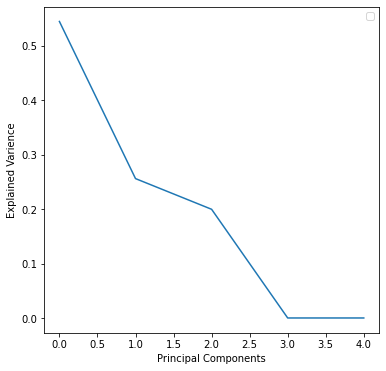

In [19]:
#use StandardScaler to transform data and Check if dimension reduction could be applied

from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df_scaled = scalar.fit_transform(X_train[Numerical_columns])
pca = PCA()
df_pca=pca.fit_transform(df_scaled)
pd.DataFrame(pca.explained_variance_ratio_).plot(figsize=(6, 6))
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.show()

Text(0, 0.5, 'Accuracy')

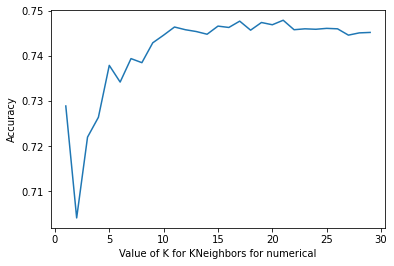

In [20]:
#Check the best k for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics


Range_k = range(1,30)
scores_list = []
for k in Range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train[Numerical_columns][:100000], Y_train[:100000])
    y_pred = classifier.predict(X_test[Numerical_columns][:10000])
    scores_list.append(metrics.accuracy_score(Y_test[:10000],y_pred))
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K for KNeighbors for numerical")
plt.ylabel("Accuracy") 

In [21]:
#Check the best k for decision tree
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree

param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid)
tree_search.fit(X_train[Numerical_columns][:30000], Y_train[:30000])

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

Tree best parameters : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0}
Tree best estimator : DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=20)
Tree best score : 0.7353000000000001


# Make prediction based on numerical data #

Accuracy on testing set =  0.7446


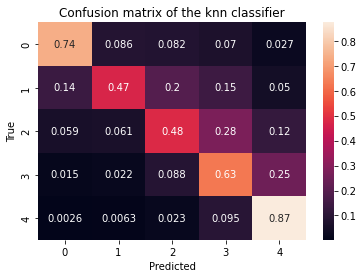

In [22]:
#Using knn model
import seaborn as sns

knn_model = KNeighborsClassifier(n_neighbors=10).fit(X_train[Numerical_columns][:100000], Y_train[:100000])
Ypred = knn_model.predict(X_test[Numerical_columns][:10000])

#Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test[:10000], Ypred))

# Plot a confusion matrix
cm = confusion_matrix(Y_test[:10000], Ypred[:10000], normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the knn classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy on testing set =  0.7371


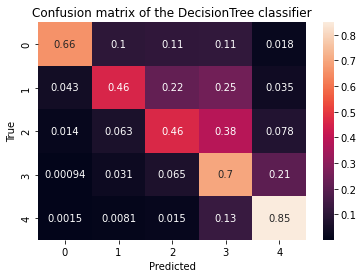

In [23]:
#using decision tree model
from sklearn.tree import DecisionTreeClassifier

d_model =DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                                min_samples_split=20).fit(X_train[Numerical_columns][:100000], Y_train[:100000])
Ypred = d_model.predict(X_test[Numerical_columns][:10000])

#Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test[:10000], Ypred))

# Plot a confusion matrix
cm = confusion_matrix(Y_test[:10000], Ypred[:10000], normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the DecisionTree classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Anylysis on text column ##

In [24]:
#Helper function for Tdif methods

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
import string


punct = string.punctuation      #list of puntuations
stopwords = list(STOP_WORDS)    # list of stopwords
snowball = SnowballStemmer(language='english')
def Cleaned_data(df):
    data=df
    message=sent_tokenize(data)
    word_tokens=[]
    for word in message:
        word_tokens+=word_tokenize(word)
    cleaned_tokens=[]
    for token in word_tokens:
        #remove all the punctuations
        if token not in punct and token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens



In [25]:
#Show the data after it passes the Cleaned_data function
print(Cleaned_data(list(df["text + summary"].values)[0]))

['Synopsis', 'On', 'daily', 'trek', 'Juarez', 'Mexico', 'El', 'Paso', 'Texas', 'increasing', 'number', 'female', 'workers', 'found', 'raped', 'murdered', 'surrounding', 'desert', 'Investigative', 'reporter', 'Karina', 'Danes', 'Minnie', 'Driver', 'arrives', 'Los', 'Angeles', 'pursue', 'story', 'angers', 'local', 'police', 'factory', 'owners', 'employee', 'undocumented', 'aliens', 'pointed', 'questions', 'relentless', 'quest', 'truth.', 'br', 'br', 'Her', 'story', 'goes', 'nationwide', 'young', 'girl', 'named', 'Mariela', 'Ana', 'Claudia', 'Talancon', 'survives', 'vicious', 'attack', 'walks', 'desert', 'crediting', 'Blessed', 'Virgin', 'rescue', 'Her', 'story', 'enhanced', '``', 'Wounds', 'Christ', "''", 'stigmata', 'appear', 'palms', 'She', 'claims', 'received', 'message', 'hope', 'Virgin', 'Mary', 'soon', 'fanatical', 'movement', 'forms', 'fight', 'evil', 'holds', 'stranglehold', 'area.', 'br', 'br', 'Critique', 'Possessing', 'lifelong', 'fascination', 'esoteric', 'matters', 'Catholic

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

#transform the text data by using TfidVectorizer
Tfid=TfidfVectorizer(tokenizer=Cleaned_data,max_features=20000, ngram_range=(1,5))
X_train_Tfid=Tfid.fit_transform(X_train[Categorical_columns][:300000])
X_test_Tfid=Tfid.fit_transform(X_test[Categorical_columns][:100000])


In [27]:
#Chest if class_weight='balanced' would improve accuracy
from sklearn.svm import LinearSVC
from sklearn import metrics

classifier = LinearSVC()
classifier.fit(X_train_Tfid, Y_train[:300000])
y_pred = classifier.predict(X_test_Tfid)
print("the accuracy without balance",metrics.accuracy_score(Y_test[:100000],y_pred))

classifier = LinearSVC(class_weight='balanced')
classifier.fit(X_train_Tfid, Y_train[:300000])
y_pred = classifier.predict(X_test_Tfid)
print("the accuracy with balance parameter",metrics.accuracy_score(Y_test[:100000],y_pred))

the accuracy without balance 0.4229
the accuracy with balance parameter 0.3493


We could see above that the LinearSVC model is better without "balanced" parameter

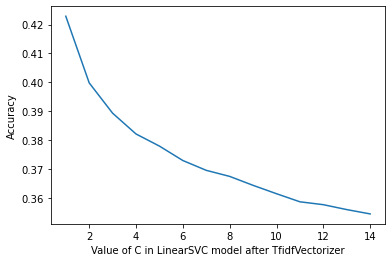

In [28]:
#Find the best parameters of LinearSVC

Range_k = range(1,15)
scores_list = []
for k in Range_k:
    classifier = LinearSVC(C=k)
    classifier.fit(X_train_Tfid, Y_train[:300000])
    y_pred = classifier.predict(X_test_Tfid)
    scores_list.append(metrics.accuracy_score(Y_test[:100000],y_pred))
plt.plot(Range_k,scores_list)
plt.xlabel("Value of C in LinearSVC model after TfidfVectorizer")
plt.ylabel("Accuracy") 
plt.show()

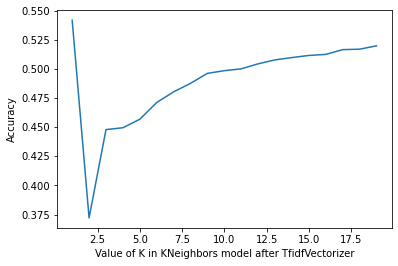

In [29]:
#Find the best parameters of KNeighborsClassifier

Range_k = range(1,20)
scores_list = []
for k in Range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train_Tfid, Y_train[:300000])
    y_pred = classifier.predict(X_test_Tfid)
    scores_list.append(metrics.accuracy_score(Y_test[:100000],y_pred))
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K in KNeighbors model after TfidfVectorizer")
plt.ylabel("Accuracy") 
plt.show()

Accuracy on testing set =  0.7371


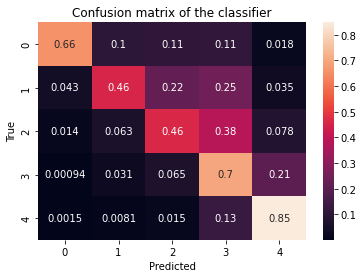

In [30]:
#using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_Tfid, Y_train[:300000])
y_pred = classifier.predict(X_test_Tfid)


#Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test[:100000], Ypred))

# Plot a confusion matrix
cm = confusion_matrix(Y_test[:100000], Ypred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy on testing set =  0.75673


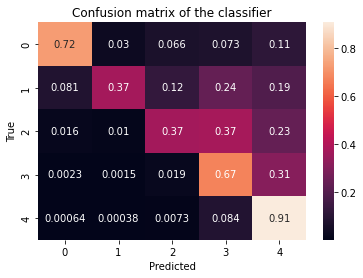

In [31]:
#Seperate numerical data and text data

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

X_train_processed_num=X_train[Numerical_columns][:300000]
X_train_processed_cat=X_train[Categorical_columns][:300000]
X_test_processed_num=X_test[Numerical_columns][:100000]
X_test_processed_cat=X_test[Categorical_columns][:100000]
Y_train1=Y_train[:300000]
Y_test1=Y_test[:100000]
# numeric_transformer=StandardScaler()

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])



#Model1
#build model
model1 = Pipeline(steps=[('Tfidf', TfidfVectorizer(tokenizer=Cleaned_data,max_features=20000, ngram_range=(1,5))),
                      ('classifier', MultinomialNB())]).fit(X_train_processed_cat, Y_train1)
#make prediction
Ypred_1 = model1.predict(X_test_processed_cat)

#Model2
#build model
model2 = KNeighborsClassifier(n_neighbors=10).fit(X_train_processed_num, Y_train1)
#make prediction
Ypred_2 = model2.predict(X_test_processed_num)

#Model3
#build model
model3 =DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, 
                              min_samples_split=20).fit(X_train_processed_num, Y_train1)
#make prediction
Ypred_3 = model3.predict(X_test_processed_num)

#vote for the most predictions
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
Ypred_final=[]
for x in range(len(Ypred_1)):
    result=[]
    result.append(Ypred_1[x])
    result.append(Ypred_2[x])
    result.append(Ypred_3[x])
    Ypred_final.append(most_frequent(result))

# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test1, Ypred_final))

# Plot a confusion matrix
cm = confusion_matrix(Y_test1, Ypred_final, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Convert numerical data into text data and merge it into review column ##

In [32]:
df.head(5)

,ProductId,UserId,Helpfulness,Score,Time,Average_product_score,Average_User_score,text + summary
0,B003AI2VGA,A141HP4LYPWMSR,1.0,3.0,1182729600,2.857143,4.144766,"Synopsis: On the daily trek from Juarez, Mexic..."
1,B003AI2VGA,A328S9RN3U5M68,1.0,3.0,1181952000,2.857143,4.131435,THE VIRGIN OF JUAREZ is based on true events s...
2,B003AI2VGA,A1I7QGUDP043DG,0.8,5.0,1164844800,2.857143,4.700441,The scenes in this film can be very disquietin...
3,B003AI2VGA,A1M5405JH9THP9,1.0,3.0,1197158400,2.857143,3.357143,THE VIRGIN OF JUAREZ (2006)<br />directed by K...
4,B003AI2VGA,ATXL536YX71TR,1.0,3.0,1188345600,2.857143,3.903409,"Informationally, this SHOWTIME original is ess..."


In [33]:
# create a list that contains the combination of text and text version of helpfulness, Average_product_score 
# and Average_User_score
final_review=[]
for index, row in df.iterrows():
    
    
    combined = ""
    combined += "The helpfulness for this product is {:}, and the average score is {:} and the user has average score of {:}.".format(row["Helpfulness"],row["Average_product_score"],row["Average_User_score"])
    final_review.append(combined)
print(len(final_review))

999990


In [34]:
#create a new column "reviews" that stores the combined text
df["reviews"]=final_review

In [35]:
#create new dataframe with only the combined colunms
df = df[["Score","reviews"]]

In [36]:
df.head(5)

,Score,reviews
0,3.0,"The helpfulness for this product is 1.0, and t..."
1,3.0,"The helpfulness for this product is 1.0, and t..."
2,5.0,"The helpfulness for this product is 0.8, and t..."
3,3.0,"The helpfulness for this product is 1.0, and t..."
4,3.0,"The helpfulness for this product is 1.0, and t..."


In [46]:
#split into train and text set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
        df['reviews'],
        df['Score'],
        test_size=0.3,
        random_state=0
    )

Accuracy on testing set =  0.67902


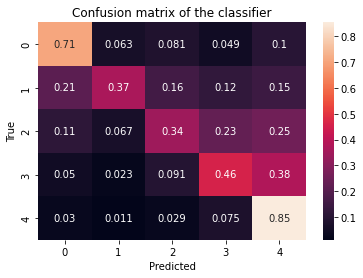

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#build the model
model = Pipeline(steps=[('Tfidf', TfidfVectorizer(tokenizer=Cleaned_data,max_features=20000, ngram_range=(1,5))),
                      ('classifier', MultinomialNB())]).fit(X_train[:300000], Y_train[:300000])
#make prediction
Ypred = model.predict(X_test[:100000])X_train['reviews']

# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test[:100000], Ypred))

# Plot a confusion matrix
cm = confusion_matrix(Y_test[:100000], Ypred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()